In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pandas import DataFrame
import scipy.stats as stats

In [2]:
TCSR_an_path = "Input_Files/Tot Constr Spend Resi Annual index2002.csv"
NHSP_an_path = "Input_Files/Median Sales Price for New Houses Sold Annual index2002.csv"
HSP_an_path = "Input_Files/Median Sales Price of Houses Sold Annual index2002.csv"

In [3]:
data1 = pd.read_csv(TCSR_an_path)
Ta_data_df = pd.DataFrame(data1)
data2 = pd.read_csv(NHSP_an_path)
NHa_data_df = pd.DataFrame(data2)
data3 = pd.read_csv(HSP_an_path)
Ha_data_df = pd.DataFrame(data3)
NHa_data_df['DATE'] = NHa_data_df['DATE'].astype('datetime64[D]')
Ta_data_df['DATE'] = Ta_data_df['DATE'].astype('datetime64[D]')
Ha_data_df['DATE'] = Ha_data_df['DATE'].astype('datetime64[D]')

In [4]:
merge1 = pd.merge(Ta_data_df, NHa_data_df, how="left", on=["DATE"])
merge1_df = pd.DataFrame(merge1)
merge1_df.head()

,DATE,TLRESCONS_NBD20020101,MSPNHS
0,2002-01-01,100.00000,100
1,2003-01-01,112.18848,103.43647
2,2004-01-01,133.78736,117.72283
3,2005-01-01,156.69656,126.58199
4,2006-01-01,153.80531,131.36963


In [5]:
TCSR_NHSP_HSP_Pop = pd.merge(merge1_df, Ha_data_df, how="left", on=["DATE"])
final_comb_df = pd.DataFrame(TCSR_NHSP_HSP_Pop)
final_comb_df.dropna(inplace=True)
final_comb_df

,DATE,TLRESCONS_NBD20020101,MSPNHS,MSPNHSUS_NBD20020101
0,2002-01-01,100.00000,100,100.00000
1,2003-01-01,112.18848,103.43647,103.43647
2,2004-01-01,133.78736,117.72283,117.72283
3,2005-01-01,156.69656,126.58199,126.58199
4,2006-01-01,153.80531,131.36963,131.36963
5,2007-01-01,123.88044,131.73445,131.73445
6,2008-01-01,91.44695,124.52822,124.52822
7,2009-01-01,65.13301,115.93028,115.93028
8,2010-01-01,63.92207,119.57393,119.57393
9,2011-01-01,63.59139,121.23587,121.23587


In [6]:
final_comb_df.dtypes

DATE                     datetime64[ns]
TLRESCONS_NBD20020101            object
MSPNHS                           object
MSPNHSUS_NBD20020101            float64
dtype: object

In [7]:
final_comb_df['TLRESCONS_NBD20020101'] = final_comb_df['TLRESCONS_NBD20020101'].astype(float)
final_comb_df['MSPNHS'] = final_comb_df['MSPNHS'].astype(float)
final_comb_df.info()
final_comb_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   21 non-null     datetime64[ns]
 1   TLRESCONS_NBD20020101  21 non-null     float64       
 2   MSPNHS                 21 non-null     float64       
 3   MSPNHSUS_NBD20020101   21 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 840.0 bytes


,DATE,TLRESCONS_NBD20020101,MSPNHS,MSPNHSUS_NBD20020101
0,2002-01-01,100.00000,100.00000,100.00000
1,2003-01-01,112.18848,103.43647,103.43647
2,2004-01-01,133.78736,117.72283,117.72283
3,2005-01-01,156.69656,126.58199,126.58199
4,2006-01-01,153.80531,131.36963,131.36963
5,2007-01-01,123.88044,131.73445,131.73445
6,2008-01-01,91.44695,124.52822,124.52822
7,2009-01-01,65.13301,115.93028,115.93028
8,2010-01-01,63.92207,119.57393,119.57393
9,2011-01-01,63.59139,121.23587,121.23587


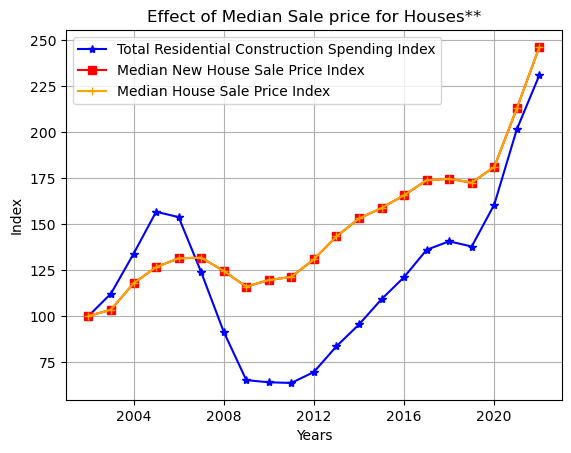

In [8]:
#all data plot
date = final_comb_df['DATE']
TCSR = final_comb_df['TLRESCONS_NBD20020101']
NHSP = final_comb_df["MSPNHS"]
HSP = final_comb_df['MSPNHSUS_NBD20020101']

TCSR = plt.plot(date, TCSR, marker="*",color="blue", label="Total Residential Construction Spending Index")
NHSP = plt.plot(date, NHSP, marker="s", color="Red", label="Median New House Sale Price Index")
HSP = plt.plot(date, HSP, marker="+",color="orange", label="Median House Sale Price Index")
plt.legend(loc="best")

plt.ylabel("Index")
plt.xlabel("Years")

plt.grid()
NC_1 = plt.gcf()
plt.show()
NC_1.savefig("Images/NC_Annual1.png")

Ttest_indResult(statistic=-2.0973382311706583, pvalue=0.042556241093287796)


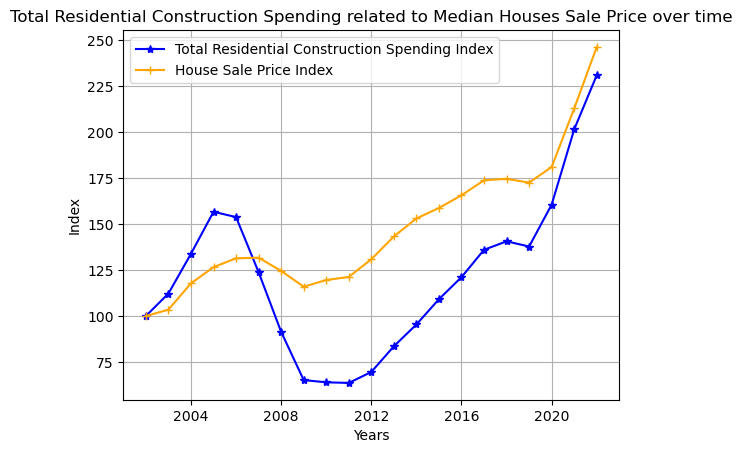

In [23]:
# Total Residential Construction Spending Index vs Median Houses Sale Price Index
date = final_comb_df['DATE']
x = final_comb_df['TLRESCONS_NBD20020101']
#NHSP = final_comb_df["MSPNHS"]
y = final_comb_df['MSPNHSUS_NBD20020101']

TCSR, = plt.plot(date, x, marker="*",color="blue", label="Total Residential Construction Spending Index")
#NHSP, = plt.plot(date, NHSP, marker="s", color="Red", label="NHSP")
HSP = plt.plot(date, y, marker="+",color="orange", label="House Sale Price Index")

plt.title("Total Residential Construction Spending related to Median Houses Sale Price over time")
plt.ylabel("Index")
plt.xlabel("Years")

ttest = stats.ttest_ind(x, y, equal_var=False)
print(ttest)

plt.legend(loc="best")
plt.grid()
NC_2 = plt.gcf()
plt.show()
NC_2.savefig("Images/NC_Annual2.png")